In [1]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px

In [2]:
%run ../../modules/utils.ipynb
%run ../../modules/cds.ipynb
%run ../../modules/preprocessing.ipynb

# Preprocessing UTMB1

In [3]:
df_glu_1 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/UTMB6.xlsx')
df_glu_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945 entries, 0 to 2944
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Monoisotopic Mass             818 non-null    float64
 1   Apex RT                       818 non-null    float64
 2   Average Mass                  2945 non-null   object 
 3   Sum Intensity                 2945 non-null   object 
 4   Relative Abundance            2945 non-null   object 
 5   Fractional Abundance          2945 non-null   object 
 6   Number of Charge States       818 non-null    float64
 7   Charge State Distribution     818 non-null    object 
 8   Number of Detected Intervals  818 non-null    float64
 9   Delta Mass                    818 non-null    float64
 10  Scan Range                    818 non-null    object 
 11  Start Time (min)              818 non-null    float64
 12  Stop Time (min)               818 non-null    float64
dtypes: 

In [4]:
df_glu_1 = thermo_df(df_glu_1)
df_glu_1.info()
df_glu_1 = df_glu_1.dropna()
df_glu_1 = df_glu_1.astype('float64')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 0 to 2942
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mass    818 non-null    float64
 1   RT      818 non-null    float64
 2   Vol     818 non-null    float64
 3   RA      818 non-null    float64
 4   FA      818 non-null    float64
dtypes: float64(5)
memory usage: 38.3 KB


In [10]:
plotly_zone(df_glu_1[(df_glu_1.Mass>6000)&(df_glu_1.Mass<8000)], y='Vol')

# Processing UTMB1_std

In [44]:
df_glu_1 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/Excels/UTMB1_std.xlsx')
df_glu_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 4 columns):
Unnamed: 0    655 non-null int64
Mass          655 non-null float64
RT            655 non-null float64
Vol           655 non-null float64
dtypes: float64(3), int64(1)
memory usage: 20.5 KB


In [14]:
df_24k = df_glu_1[(df_glu_1.Mass>24000)&(df_glu_1.Mass<26000)]
plotly_zone(df_24k, y='Vol')

In [48]:
df_glu_kernel = df_glu_1[(df_glu_1.Mass > 1500) & (df_glu_1.Mass < 15000)]

In [49]:
df_glu_kernel = df_glu_kernel.sort_values('Vol', ascending=False)

In [50]:
df_glu_kernel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 22 to 654
Data columns (total 4 columns):
Unnamed: 0    248 non-null int64
Mass          248 non-null float64
RT            248 non-null float64
Vol           248 non-null float64
dtypes: float64(3), int64(1)
memory usage: 9.7 KB


In [56]:
df_glu_top = df_glu_kernel[:800]
# df_glu_top = df_glu_top[df_glu_top.RT < 4]
fig = px.scatter(x=df_glu_top.Mass, y=df_glu_top.RT)
fig.show()

In [55]:
import plotly.graph_objects as go

idxs = list()
# create our callback function
def update_point(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

x = df_glu_top.Mass
y = df_glu_top.RT
f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])
f.update_layout(autosize=False, width=1024, height=700, paper_bgcolor="LightSteelBlue",
    margin=dict(
        l=20,
        r=20,
        b=20,
        t=20,
        pad=4
    ))
scatter = f.data[0]
scatter.on_selection(update_point)
f

FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'uid': '222fef5…

In [23]:
df_glu_top_a = df_glu_top.iloc[idxs]

In [57]:
df_glu_top_b = df_glu_top#.iloc[idxs]

In [58]:
df_glu_top_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 22 to 654
Data columns (total 4 columns):
Unnamed: 0    248 non-null int64
Mass          248 non-null float64
RT            248 non-null float64
Vol           248 non-null float64
dtypes: float64(3), int64(1)
memory usage: 9.7 KB


In [61]:
df_glu_top_b = df_glu_top_b.sort_values('Vol', ascending=False)
df_glu_top_b_top = df_glu_top_b[:800]
fig = px.scatter(x=df_glu_top_b_top.Mass, y=df_glu_top_b_top.RT)
fig.show()
# plot_zones(df_glu_top_a, df_glu_top_b)

mass_x (248,) mass_y (248,)
df3_idxs 12 df5_idxs 12
df3_idxs 18 df5_idxs 18
df3_idxs 17 df5_idxs 17
df3_idxs 18 df5_idxs 18
df3_idxs 2 df5_idxs 2
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1
df3_idxs 0 df5_idxs 0


<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>

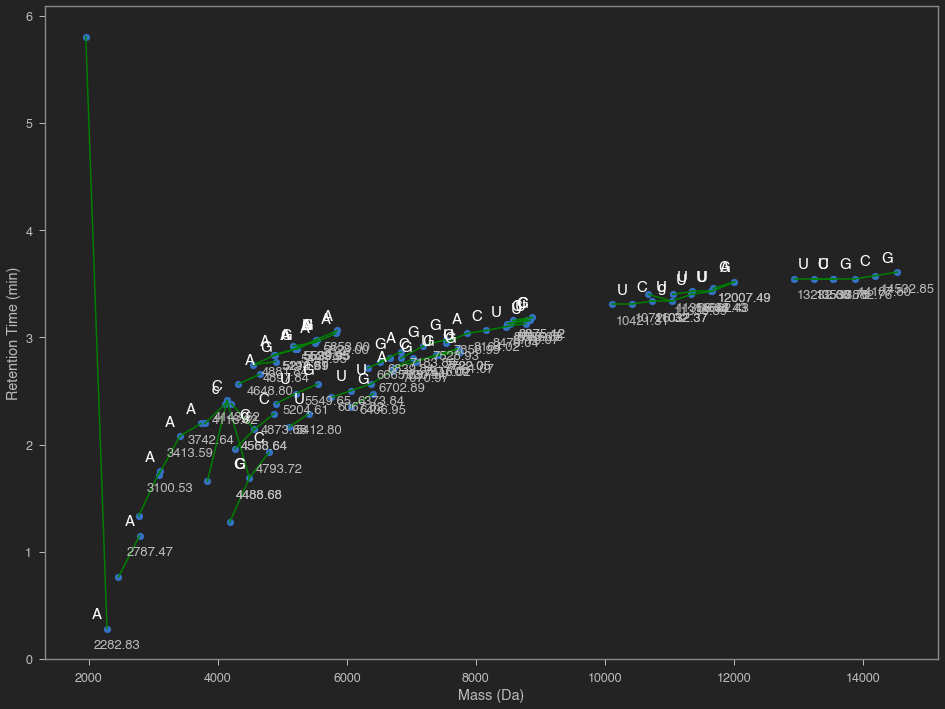

In [62]:
# df_paired_5p_top = df_paired_5p.sort_values('Vol', ascending=False).iloc[:27]
bcr_5p = base_calling_random(df_glu_top_b_top)
plot_basecalling(*bcr_5p, annotate=True)

# Grouped RT, Top Vol 

In [37]:
df1 = df_glu_top_b_top
df1_top = df1[(df1.Mass > 2000) & (df1.Mass < 22000)].sort_values('Vol').groupby('RT').tail(3)

In [38]:
import plotly.graph_objects as go

idxs = list()
# create our callback function
def update_point(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

# df_draw = df2[(df2.Mass > 12329) & (df2.Mass < 22000) & (df2.RT < 25) & (df2.RT > 8)]
# df_draw = df2_chosen[:100] #df7
df_draw = df1_top#[(df7_top.RT < 25) & (df7_top.RT > 8)]
x = df_draw.Mass
y = df_draw.RT
fig = go.Scatter(x=x, y=y, mode='markers')
f = go.FigureWidget(fig)
f.update_layout(autosize=False, width=1024, height=700, paper_bgcolor="LightSteelBlue",
    margin=dict(
        l=20,
        r=20,
        b=20,
        t=20,
        pad=4
    ))
scatter = f.data[0]
scatter.on_selection(update_point)
f

FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'uid': '79a73e5…

In [39]:
df1_chosen = df_draw#.iloc[idxs]
df1_chosen.info()
df1_chosen = df1_chosen.sort_values('Vol', ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 654 to 291
Data columns (total 4 columns):
Unnamed: 0    91 non-null int64
Mass          91 non-null float64
RT            91 non-null float64
Vol           91 non-null float64
dtypes: float64(3), int64(1)
memory usage: 3.6 KB


mass_x (235,) mass_y (235,)
df3_idxs 12 df5_idxs 12
df3_idxs 17 df5_idxs 17
df3_idxs 17 df5_idxs 17
df3_idxs 18 df5_idxs 18
df3_idxs 2 df5_idxs 2
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1
df3_idxs 0 df5_idxs 0


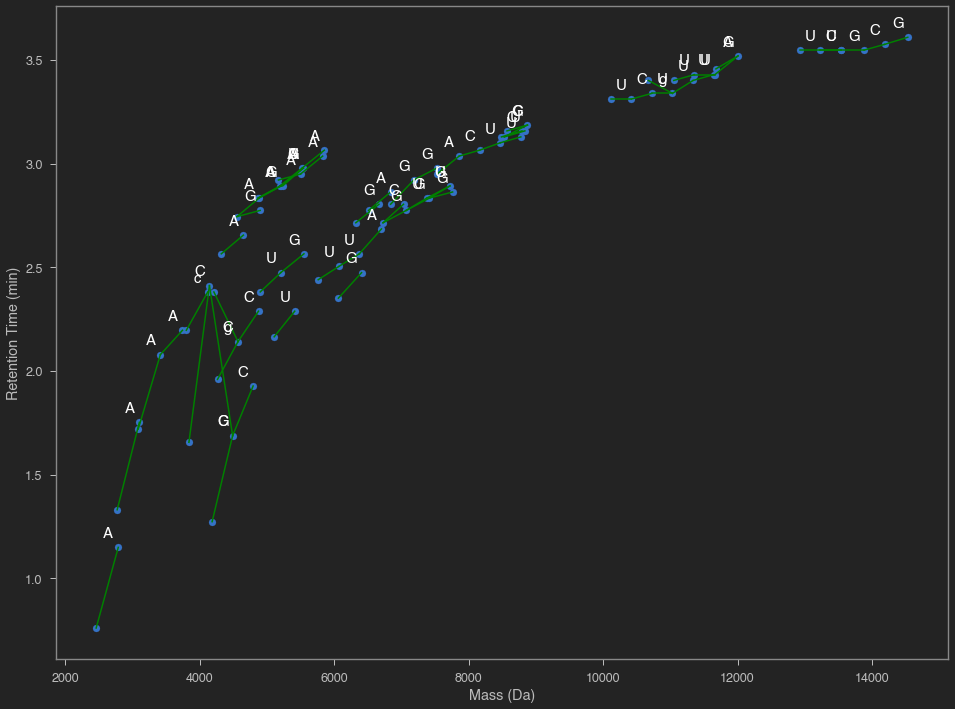

In [41]:
# plot_zone(df2_chosen[:100])
bcr_5p = base_calling_random(df_glu_top)
plt = plot_basecalling(*bcr_5p, annotate=True)
# plt.savefig('/Users/bryan/Downloads/Glu_1.png', bbox_inches='tight', transparent=True)